# Homework 3

The data set we will be using is called 'Healthcare Insurance' found using this link: [https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance). The dataset contains information on the relationship between  a person's attributes (like age, gender, BMI, family size, smoking habits), geographic factors, and the impact on their medical insurance charges. For the homework assignment we will be focusing on the variables "**BMI** (Body Mass Index)" and "**Charges** (The medical insurance costs incurred by the insured person)".

**Question 1:**

We take a look at the column variable of "BMI". We can plot the distribution of this variable in a histogram below.

In [61]:
# import packages
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt;
from scipy import stats

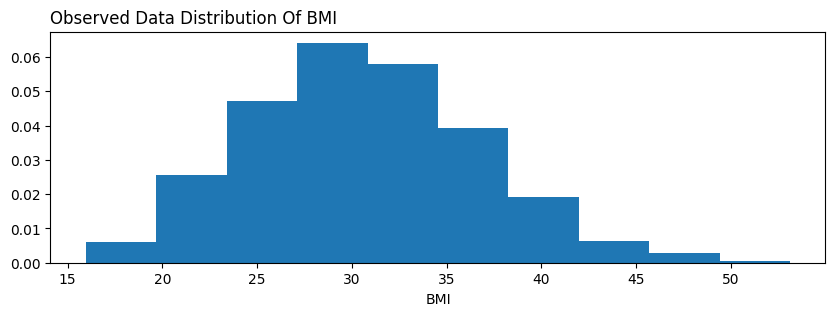

In [225]:
data = pd.read_csv('insurance.csv')
x = data["bmi"]

fig,ax = plt.subplots(1, figsize=(10,3))
ax.hist(x, density=True);
ax.set_title('Observed Data Distribution Of BMI', loc='left')
ax.set_xlabel("BMI");

From the histogram above we can see that the BMI variable is roughly normally distributed. Thus we can apply our current normal_gamma_toy_model to provide a posterior inference on this column of data. This is shown below:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 290 seconds.


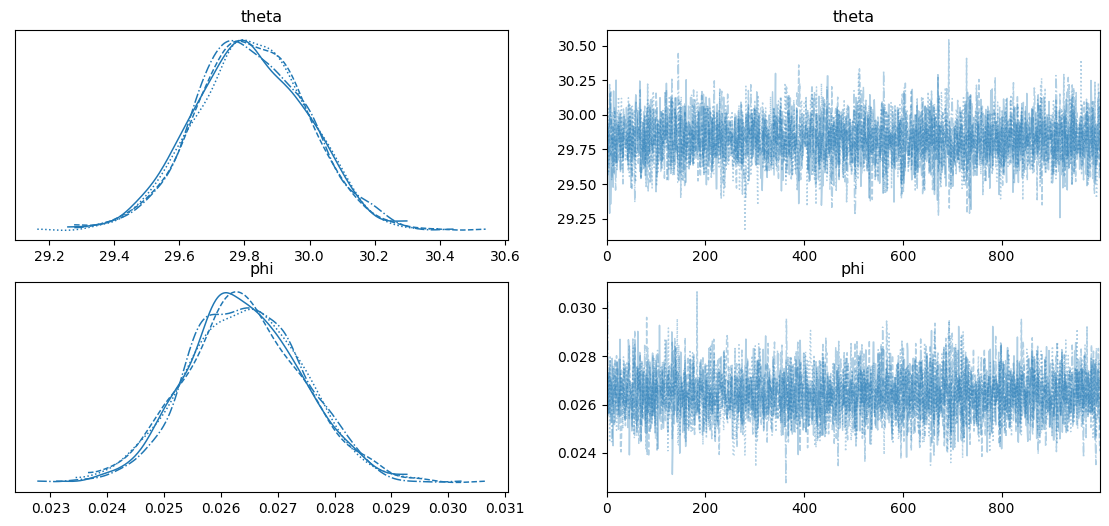

In [218]:
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model: 
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=x)

with normal_gamma_toy_model:
    idata_HMC = pm.sample()

fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(idata_HMC, axes=ax);

c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


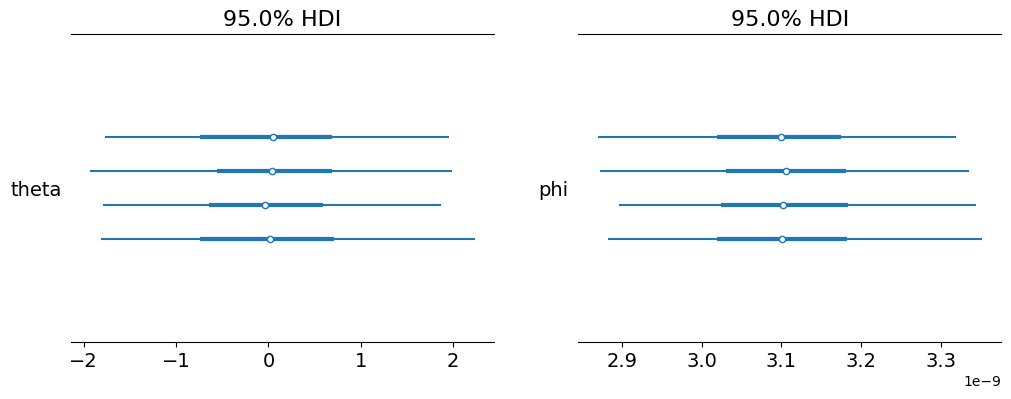

In [103]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1]);

In [228]:
# Posterior values
theta = idata_HMC['posterior']['theta'].values.mean()
phi = idata_HMC['posterior']['phi'].values.mean()

# Observed Values
data_mean = data["bmi"].mean()
data_phi = 1/np.var(data["bmi"])

print("The Posterior estimate is {} while the observed mean is {}".format(theta, data_mean))
print("The Posterior estimate is {} while the observed phi is {}".format(phi, data_phi))

The Posterior estimate is 29.82023877687494 while the observed mean is 30.66339686098655
The Posterior estimate is 0.026423038043992975 while the observed phi is 0.02691059146192758


We can see that the posterior calculated phi and theta are closely related to that of the observed data.

**Question 2:**

We take a look at the column variable of "Charges" which is the medical insurance costs incurred by the insured person. We can plot the distribution of this variable in a histogram below.

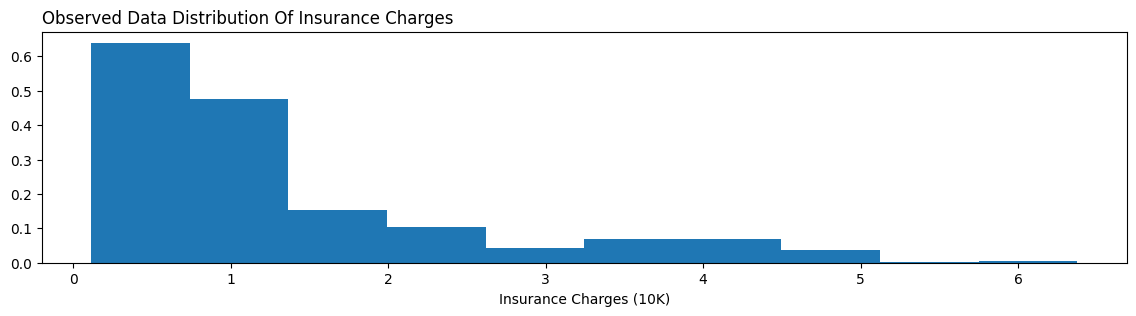

In [227]:
fig,ax = plt.subplots(1, figsize=(14,3))
ax.hist(data["charges"]/10000, density=True) # scaled down to show the skewness
ax.set_title('Observed Data Distribution Of Insurance Charges', loc='left')
ax.set_xlabel('Insurance Charges (10K)');

The data does not resemble a normal distribution and thus if we were to apply our current normal_gamma_toy_model to provide a posterior inference on this column of data, it would provide inaccurate estimates for our parameters.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 356 seconds.


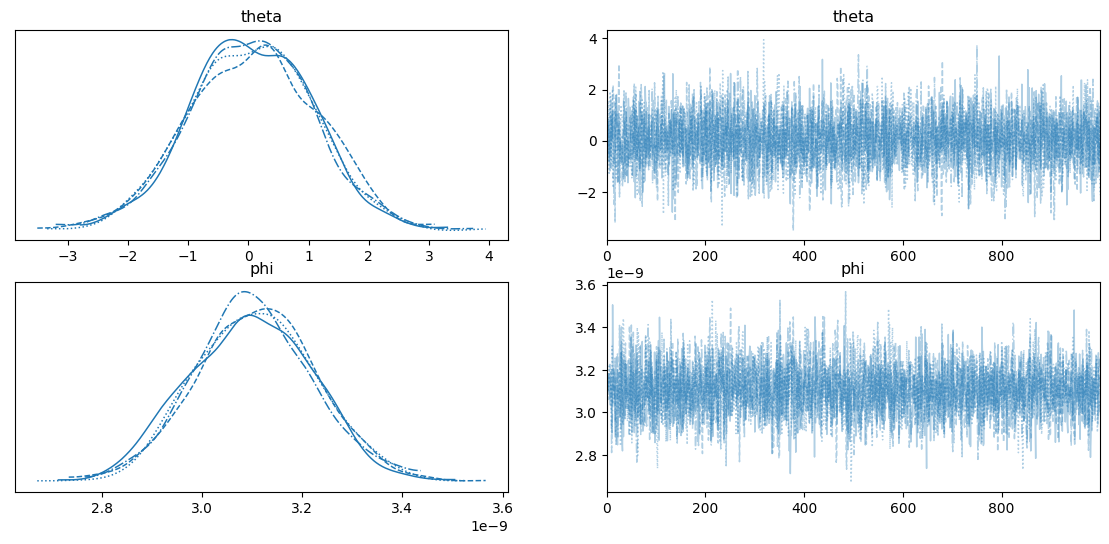

In [229]:
x = data["charges"]

normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model: 
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=x)

with normal_gamma_toy_model:
    idata_HMC = pm.sample()

fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(idata_HMC, axes=ax);

c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


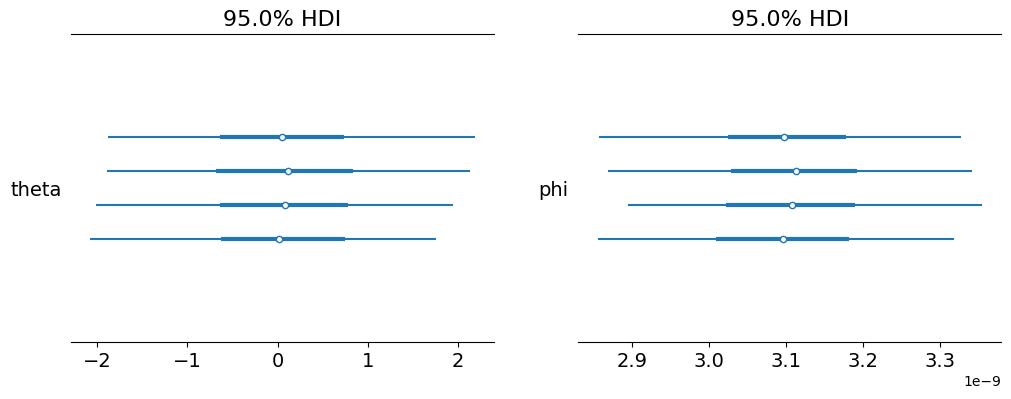

In [230]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(idata_HMC, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1]);

In [231]:
# Posterior values
theta = idata_HMC['posterior']['theta'].values.mean()
phi = idata_HMC['posterior']['phi'].values.mean()

# Observed Values
data_mean = data["charges"].mean()
data_phi = 1/np.var(data["charges"])

print("The Posterior estimate is {} while the observed mean is {}".format(theta, data_mean))
print("The Posterior estimate is {} while the observed phi is {}".format(phi, data_phi))

The Posterior estimate is 0.055868615761040206 while the observed mean is 13270.422265141257
The Posterior estimate is 3.1045802112477196e-09 while the observed phi is 6.823946510140633e-09


Since we used the wrong PyMC model to represent the observed data, it has led to inaccurate or misleading parameter estimates shown above. We can see that the parameter of theta (mean of the observed data) is incorrectly estimated using the model, as well as the phi.

**Question 3 & 4:**

Looking at the histogram plot of the variable "charges" we can see that the data is heavily right skewed. So when we are thinking about distributions that can be sued to represent the observed data, we can think of the gamma distribution. The gamma distribution is a flexible distribution that can accommodate right-skewed data well. It's characterized by its shape (alpha) and rate (beta) parameters, which modifies the shape and location of the distribution (this makes it very flexible). Looking at the insurance charges histogram again, we can see that the values are non-negative and grow large. This is another reason why we choose to model the data with a gamma distribution since the distribution is defined only for non-negative values, meaning it can produce values from 0 to positive infinity.

Now that we have chosen a reasonable reasonable likelihood to model our observed data, we would have to choose a reasonable prior distribution to model the values the parameters of your likelihood can take on. For a gamma distribution we can see that the required parameters is alpha and beta, both of which are non negative [https://en.wikipedia.org/wiki/Gamma_distribution](https://en.wikipedia.org/wiki/Gamma_distribution). This is where the exponential distribution comes to play as this distribution is commonly used for modeling positive-valued parameters because they have support on the positive real numbers. So for the context of parameters like alpha and beta for the gamma distribution, which represent shape and rate, respectively, it's essential that they remain positive to ensure that the gamma distribution is well-defined. Thus we choose the exponential distribution with lambda 1 as it can only return positive numbers greater than zero (as required by alpha and beta for gamma dist).

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 336 seconds.


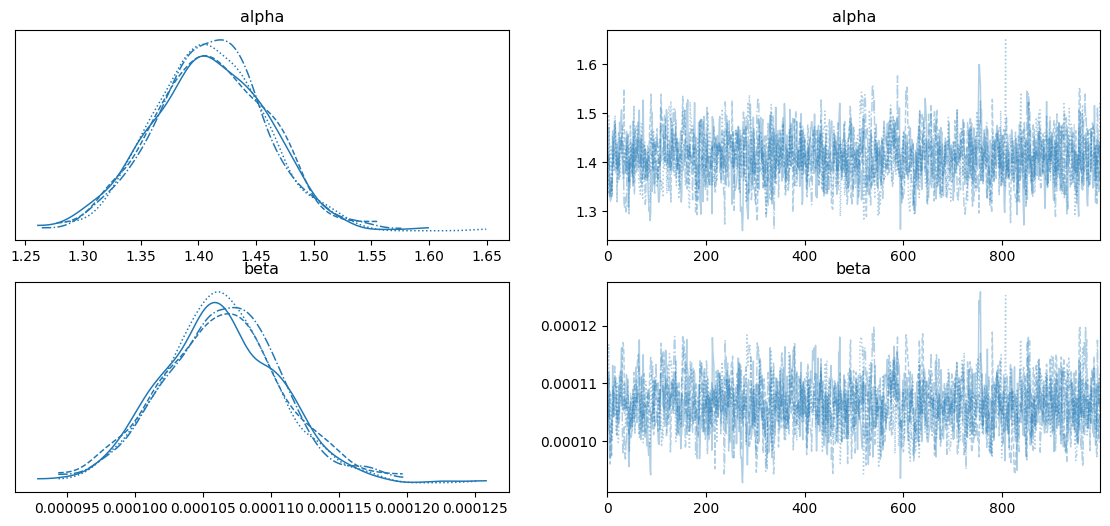

In [234]:
x = data["charges"]

# Define the PyMC model
positive_skewed_model = pm.Model()
with positive_skewed_model:
    # Define weakly informative priors for parameters
    alpha = pm.Exponential("alpha", lam=1)
    beta = pm.Exponential("beta", lam=1)
    
    # Define likelihood function
    obs = pm.Gamma("obs", alpha=alpha, beta=beta, observed=x)
    
    # Sample from the posterior distribution
    trace = pm.sample()

fig,ax = plt.subplots(2,2, figsize=(14,6))
az.plot_trace(trace, axes=ax);

c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
c:\users\justi\appdata\local\programs\python\python39\lib\site-packages\arviz\plots\backends\matplotlib\forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


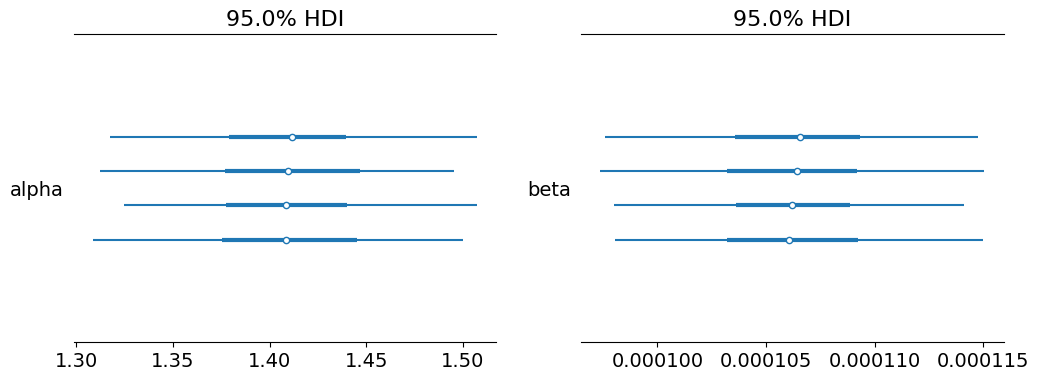

In [253]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
az.plot_forest(trace, var_names=["alpha"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(trace, var_names=["beta"], combined=False, hdi_prob=0.95, ax=ax[1]);

In [254]:
print("number of MCMC samples:", trace.posterior['alpha'].values.flatten().shape[-1])
az.summary(trace, round_to=2)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.41,0.05,1.31,1.49,0.0,0.0,1269.31,1522.41,1.0
beta,0.00,0.00,0.00,0.00,0.0,0.0,1184.10,1364.81,1.0


We can see that the total number of MCMC samples is 4000.

The effective sample size for the "bulk" of the parameter space for alpha is 1269.31, indicating that we effectively have around 1269 independent samples in the region where the chain spends most of its time. Similarly, the effective sample size for the "tail" of the parameter space is 1522.41, suggesting approximately 1522 independent samples in the less frequently visited regions.

The same goes with the beta parameter where the effective sample size for the "bulk" of the parameter space is 1184.10, indicating that we effectively have around 1184 independent samples in the region where the chain spends most of its time. Similarly, the effective sample size for the "tail" of the parameter space is 1364.81, suggesting approximately 1365 independent samples in the less frequently visited regions. These values for alpha and beta demonstrate good sampling efficiency across both the primary and less explored parts of the parameter space. 

Additionally, the Gelman-Rubin statistic $\hat{R}$ for both alpha and beta is 1.0, signifying convergence among the 4 chains. This convergence reassures that the chains have converged to the same distribution, enhancing confidence in the reliability of the posterior parameter estimates obtained from the PyMC model.

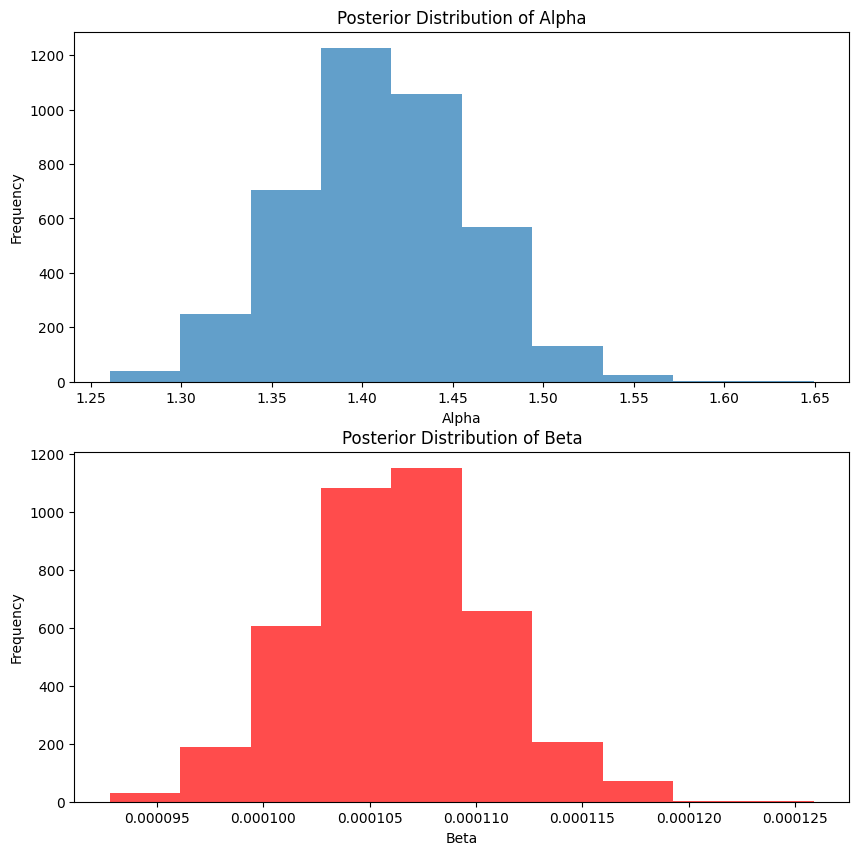

In [265]:
fig,ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(trace['posterior']['alpha'].values.flatten(), alpha=0.7)
ax[0].set_title('Posterior Distribution of Alpha')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Frequency')

ax[1].hist(trace['posterior']['beta'].values.flatten(), color='red', alpha=0.7)
ax[1].set_title('Posterior Distribution of Beta')
ax[1].set_xlabel('Beta')
ax[1].set_ylabel('Frequency');

In [266]:
alpha = trace['posterior']['alpha'].values.mean()
beta = trace['posterior']['beta'].values.mean()
print("Alpha estimate is: {}".format(alpha))
print("Beta estimate is: {}".format(beta))

Alpha estimate is: 1.410236226888881
Beta estimate is: 0.00010633367616031152


From the posterior distributions and printed values above, we are able to obtain the estimated values of our alpha and beta. But how are we able to see whether these estimates are inaccurate or misleading? We can show their distribution below:

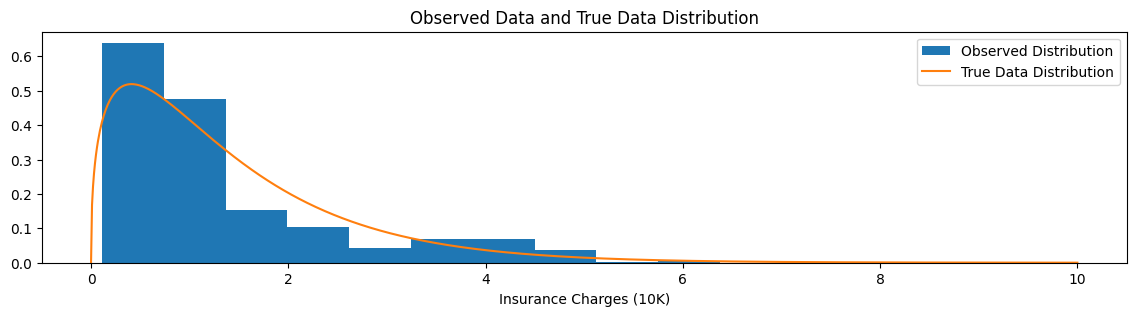

In [267]:
pdf = stats.gamma(alpha,beta).pdf(parameter_domain)
fig,ax = plt.subplots(1, figsize=(14,3))
ax.hist(data["charges"]/10000, density=True, label = 'Observed Distribution'); #scale the claims in insurance downwards
ax.plot(parameter_domain, pdf, label = 'True Data Distribution')
ax.set_title('Observed Data and True Data Distribution')
ax.set_xlabel('Insurance Charges (10K)')
ax.legend();

From the graph above we can see that the True Data Distribution fits that of the distribution observed by the data showing greatly, the positive skewness of the variable measuring insurance charges.